# MATH 210 Introduciton to Mathematical Computing

## November 28, 2018

* Numerical Solutions of ODEs
    * Mass sprin damper systems
    * Van der pol equation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi
%matplotlib inline

## Mass Spring Damper System

A mass spring damper system is a second order constant equation

$$
my'' + cy' + ky = f(t)
$$

we need to rewrite this as a 2-dimensional first order system by introducing new variables $u_0 = y$ and $u_1 = y'$:

\begin{align*}
u'_0 &= u_1 \\
u'_1 &= (1/m)(-ku_0-cu_1+f(t))
\end{align*}

Write a function called `mass_spring_damper` which takes input parameters `m`, `c`, `k`, `f`, `u0` and `t` where

* `m`, `c`, `k` are coefficients of the system
* `f` is a function of `t`, the forcing function of the system
* `u0` vector of length 2, initial condition `u0 = [y(0), y'(0)]`
* `t` array of time values where we are approximating `y` and `y'`

The function plots $y$ vs. $t$ and returns the array of $y$ values.

In [2]:
def mass_spring_damper(m,c,k,f,u0,t):

    def odefun(u,t):
        dudt = np.zeros(2)
        dudt[0] = u[1]
        dudt[1] = (1/m)*(-k*u[0] - c*u[1] + f(t))
        return dudt

    u = spi.odeint(odefun,u0,t)
    y = u[:,0]
    plt.plot(t,y)
    plt.show()
    
    return y

If $m=1$, $c=0$, $k=1$, $f(t)=0$, $y(0)=0$, $y'(0)=1$ then the equation is

$$
y'' + y = 0
$$

for $y(0)=0$, $y'(0)=1$ and the solution is

$$
y=\sin(t)
$$

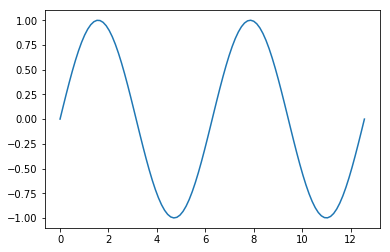

In [3]:
y = mass_spring_damper(1,0,1,lambda t: 0,[0,1],np.linspace(0,4*np.pi,100))

### Resonance

Resonance occurs when there's no damping $c=0$ and the forcing frequency is equal to the natural frequency $\sqrt{k/m}$.

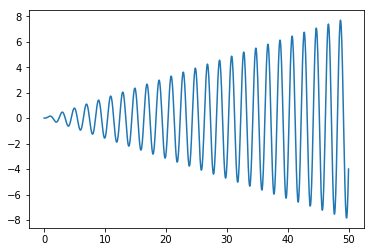

In [4]:
mass_spring_damper(1,0,10,lambda t: np.sin(10**0.5*t),[0,0],np.linspace(0,50,1000));

### Beats

Beating describes the behaviour of an undamped system $c=0$ when the forcing frequency is near but not equal to the natural frequency.

In [5]:
10**0.5

3.1622776601683795

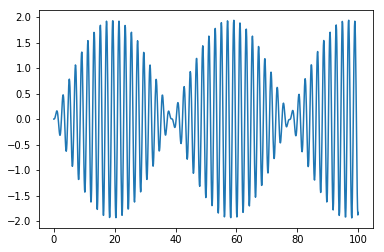

In [6]:
mass_spring_damper(1,0,10,lambda t: np.sin(3*t),[0,0],np.linspace(0,100,1000));

### Pratical Resonsance

In a damped system $c \not= 0$ there cannot be resonance however there is a forcing frequency which produces the largest steady state amplitude. This frequency is called the damped natural frequency.

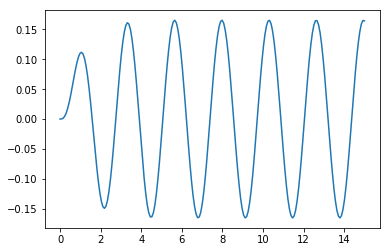

In [7]:
mass_spring_damper(1,2,10,lambda t: np.sin(2.7*t),[0,0],np.linspace(0,15,200));

## Van der pol oscillator

The [Van der pol oscillator](https://en.wikipedia.org/wiki/Van_der_Pol_oscillator) equation is

$$
x'' - \mu(1 - x^2)x' + x = 0
$$

Let's write a function which takes parameters `mu`, `u0` and `t` and plots the solution of the van der pol equation in the phase plane $x$ versus $x'$. The function returns the matrix with $x$ values in the column at index 0 and $x'$ in column at index 1.

Let $u_0 = x$ and $u_1 = x'$.

In [8]:
def van_der_pol(mu,u0,t):

    def odefun(u,t):
        dudt = np.zeros(2)
        dudt[0] = u[1]
        dudt[1] = mu*(1 - u[0]**2)*u[1] - u[0]
        return dudt

    u = spi.odeint(odefun,u0,t)
    x = u[:,0]
    dxdt = u[:,1]
    plt.plot(x,dxdt)
    plt.show()
    
    return u

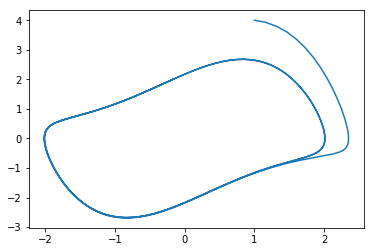

In [9]:
U = van_der_pol(1,[1,4],np.linspace(0,20,500))

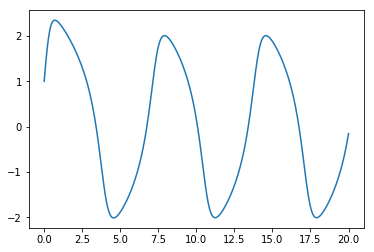

In [10]:
t = np.linspace(0,20,500)
x = U[:,0]
plt.plot(t,x)
plt.show()